<a href="https://colab.research.google.com/github/gajula9m/ImageClassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower", 
                    limit = 30, 
                    output_dir = 'images', 
                    adult_filter_off = True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather", 
                    limit = 30, 
                    output_dir = 'images', 
                    adult_filter_off = True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("ice cream cone", 
                    limit = 30, 
                    output_dir = 'images', 
                    adult_filter_off = True)

In [ ]:
# Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array, (150,150,3)) # Normalize the values to 0 to 1
    images.append(img_resized)
    flat_data.append(img_resized.flatten())
    target.append(class_num)
    
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 24.3 s (started: 2023-01-04 20:03:38 +00:00)


<BarContainer object of 3 artists>

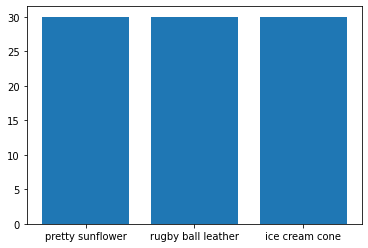

time: 177 ms (started: 2023-01-04 20:04:02 +00:00)


In [ ]:
unique,count = np.unique(target, return_counts=True)
plt.bar (CATEGORIES, count)

In [ ]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, 
                                      test_size = 0.3, random_state=32)

time: 16.4 ms (started: 2023-01-04 20:04:02 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C': [1,10,100,1000], 'kernel': ['linear']},
              {'C': [1,10,100,1000], 'gamma':[0.001, 0.0001], 'kernel': ['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 3s (started: 2023-01-04 20:04:02 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 1, 2])

time: 314 ms (started: 2023-01-04 20:05:06 +00:00)


In [ ]:
y_test

array([1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0,
       2, 0, 1, 1, 2])

time: 5.51 ms (started: 2023-01-04 20:05:06 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.8148148148148148

time: 11.7 ms (started: 2023-01-04 20:05:06 +00:00)


In [ ]:
confusion_matrix(y_pred, y_test)

array([[10,  2,  2],
       [ 0,  6,  1],
       [ 0,  0,  6]])

time: 10.6 ms (started: 2023-01-04 20:05:06 +00:00)


In [ ]:
# save model using pickle
import pickle
pickle.dump(clf, open('img_model.p', "wb"))

time: 60.6 ms (started: 2023-01-04 20:12:19 +00:00)


In [ ]:
model = pickle.load(open('img_model.p', 'rb'))

time: 24.5 ms (started: 2023-01-04 20:14:31 +00:00)


Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/a/a9/A_sunflower.jpg
(1024, 768, 3)
 PREDICTED OUTPUT: pretty sunflower


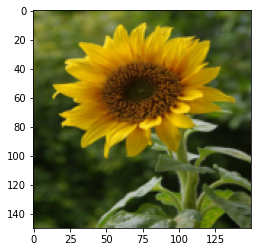

time: 2.39 s (started: 2023-01-04 20:33:22 +00:00)


In [ ]:
# Testing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img, (150, 150, 3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [32]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py
import streamlit as st
st.title('Image Classifier using Machine Learning')


Overwriting app.py


In [44]:
!nohup streamlit run app.py &

url = ngrok.connect(port=8501)
url

# !streamlit run --server.port 80 app.py >/dev/null

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://e2f3-35-236-210-230.ngrok.io" -> "http://localhost:80">

In [39]:
!killall -9 ngrok

In [42]:
!ps -e

    PID TTY          TIME CMD
      1 ?        00:00:01 docker-init
      7 ?        00:00:39 node
     18 ?        00:00:02 tail
     31 ?        00:00:22 oom_monitor.sh
     33 ?        00:00:00 run.sh
     35 ?        00:00:08 kernel_manager_
     59 ?        00:00:06 python3 <defunct>
     60 ?        00:00:01 colab-fileshim.
     82 ?        00:00:25 jupyter-noteboo
     83 ?        00:00:19 dap_multiplexer
  47674 ?        00:00:46 python3
  47701 ?        00:00:10 python3
  85001 ?        00:00:49 node
  85855 ?        00:00:00 sleep
  85856 ?        00:00:00 ps


'/content'